In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.shape

(294478, 5)

In [4]:
df['converted'].mean()

0.11965919355605512

In [5]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [6]:
df.group

0           control
1           control
2         treatment
3         treatment
4           control
            ...    
294473      control
294474      control
294475      control
294476      control
294477    treatment
Name: group, Length: 294478, dtype: object

In [7]:
df.query('group == "treatment" and landing_page !="new_page"')

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [8]:
df2t = df.query('group == "treatment" and landing_page == "new_page"')
df2c = df.query('group == "control" and landing_page == "old_page"')

In [9]:
df2 = df2t.merge(df2c, how='outer')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [10]:
df2.shape

(290585, 5)

In [11]:
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [12]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [13]:
df2[df2['user_id'].duplicated(keep='first')]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [14]:
# df2.drop(index=df2[df2['user_id'].duplicated(keep='first')].index, inplace=True)
df2 = df2[~df2['user_id'].duplicated(keep='first')]

In [15]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [16]:
df2_control = df2[df2['group'] == 'control']
df2_treatment = df2[df2['group'] == 'treatment']

In [17]:
df2_control['converted'].mean() * 100

12.03863045004612

In [18]:
df2_treatment['converted'].mean() * 100

11.880806551510565

In [42]:
df2['converted'].mean()

0.11959708724499628

In [44]:
1 - df2['converted'].mean()

0.8804029127550037

In [40]:
len(df2_treatment)

145310

In [46]:
        new_page_converted = np.random.choice([1, 0], size=len(df2_treatment), p=[(df2['converted'].mean()), (1 - df2['converted'].mean())])

In [48]:
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

(array([128015.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17295.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

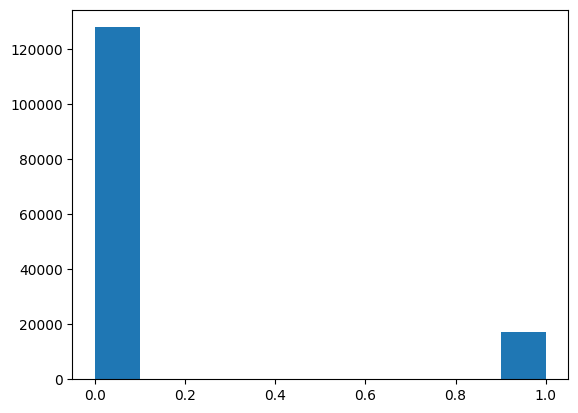

In [52]:
plt.hist(new_page_converted)

In [54]:
old_page_converted = np.random.choice([1, 0], size=len(df2_treatment), p=[(df2['converted'].mean()), (1 - df2['converted'].mean())])

In [90]:
new_page_converted = np.random.binomial(len(df2_treatment), df2.converted.mean(), 10000) / len(df2_treatment)

In [92]:
old_page_converted = np.random.binomial(len(df2_control), df2.converted.mean(), 10000) / len(df2_treatment)

In [94]:
p_diffs = new_page_converted - old_page_converted

In [96]:
p_diffs.mean()

1.090840272520814e-05

In [98]:
ab_data_diff = df2_treatment.converted.mean() - df2_control.converted.mean()

In [100]:
ab_data_diff

-0.0015782389853555567

In [118]:
(p_diffs > ab_data_diff).mean() * 100

90.72

In [124]:
p_value = (p_diffs < ab_data_diff).mean() * 100
p_value

9.28

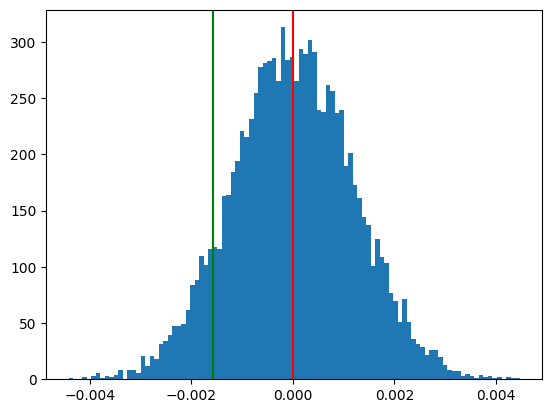

In [126]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')